<a href="https://colab.research.google.com/github/HoangQuanHCMUTEK19/CNN/blob/main/Nhandienkhuonmat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout,Flatten,Conv2D,MaxPooling2D
from keras.datasets import mnist, fashion_mnist, cifar10, cifar100
from tensorflow.keras.optimizers import Adam, RMSprop,SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from keras.utils import np_utils
import cv2
import matplotlib.pyplot as plt
import numpy as np
import tensorflow.compat.v2 as tf
from tensorflow import keras
import os
import pickle
import pandas as pd
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model

In [2]:
#Link Train va test
train_path = "/content/drive/MyDrive/train"
test_path = "/content/drive/MyDrive/test"

In [3]:
#Ket noi voi google drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


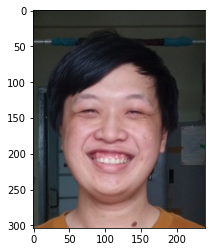

(304, 240, 3)

In [4]:
#Load va Hien thi anh
img = load_img(train_path + "/Quan/301.png")
plt.imshow(img)
plt.axis("on")
plt.show()
img = img_to_array(img)
img.shape

In [7]:
#Load anh thanh train va test 
train = ImageDataGenerator(rescale=1/255,shear_range=0.3,horizontal_flip=True,vertical_flip=False,zoom_range=0.3)
test =ImageDataGenerator(rescale=1/255)
train_dataset = train.flow_from_directory(train_path,target_size=(150,150),batch_size=32,color_mode="rgb",class_mode="categorical")
test_dataset = test.flow_from_directory(test_path,target_size=(150,150),batch_size=32,color_mode="rgb",class_mode="categorical")

Found 69 images belonging to 3 classes.
Found 30 images belonging to 3 classes.


In [8]:
test_dataset.class_indices

{'Luu': 0, 'Nhat': 1, 'Quan': 2}

In [9]:
#Thiet Lap Model 
model = Sequential()
model.add(Conv2D(32,(3,3),activation = 'relu',input_shape=(150,150,3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3),activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(256,(3,3),activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(128,activation='relu'))

model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.01))

model.add(Dense(3,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [10]:
#Complie Model 
model.compile(optimizer="SGD", loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
#Training Model 
history = model.fit(train_dataset,epochs = 50,batch_size=64, validation_data = test_dataset)

Epoch 1/50
3/3 [==============================] - 38s 7s/step - loss: 1.1014 - accuracy: 0.3043 - val_loss: 1.0982 - val_accuracy: 0.3000
Epoch 2/50
3/3 [==============================] - 1s 385ms/step - loss: 1.0889 - accuracy: 0.3043 - val_loss: 1.0891 - val_accuracy: 0.3000
Epoch 3/50
3/3 [==============================] - 1s 394ms/step - loss: 1.0821 - accuracy: 0.3768 - val_loss: 1.0908 - val_accuracy: 0.6333
Epoch 4/50
3/3 [==============================] - 1s 398ms/step - loss: 1.0787 - accuracy: 0.7246 - val_loss: 1.0785 - val_accuracy: 0.6333
Epoch 5/50
3/3 [==============================] - 1s 398ms/step - loss: 1.0663 - accuracy: 0.7246 - val_loss: 1.0666 - val_accuracy: 0.6333
Epoch 6/50
3/3 [==============================] - 1s 416ms/step - loss: 1.0675 - accuracy: 0.6232 - val_loss: 1.0594 - val_accuracy: 0.6333
Epoch 7/50
3/3 [==============================] - 1s 415ms/step - loss: 1.0556 - accuracy: 0.7246 - val_loss: 1.0737 - val_accuracy: 0.4333
Epoch 8/50
3/3 [======

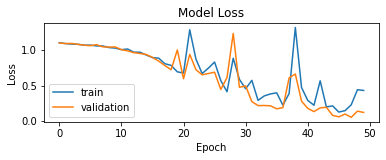

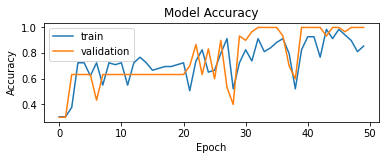

In [12]:
#Ve Do thi Loss
plt.subplot(2,1,1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train','validation'])
plt.show()
#Ve Do thi Accuracy
plt.subplot(2,1,2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train','validation'])
plt.show()

In [13]:
#Tinh toan do chinh xac va sai so 
score = model.evaluate(test_dataset,verbose = 0)
print('Sai so kiem tra la:',score[0])
print('Do chinh xac kiem tra', score[1])

Sai so kiem tra la: 0.12228550761938095
Do chinh xac kiem tra 1.0


In [14]:
label=['Luu', 'Nhat', 'Quan']

Day la Luu


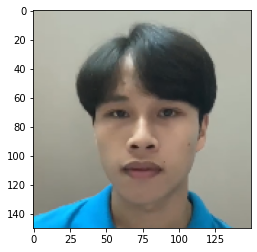

In [16]:
#Load va hien thi anh 
img = load_img(test_path + "/Luu/12.png",grayscale=False,color_mode='rgb',target_size=(150,150))
plt.imshow(img)
#Chuyen Anh ve Dang Array
img = img_to_array(img)
x = np.expand_dims(img,axis=0)
images = np.vstack([x])
#Du Doan hinh anh 
print('Day la '+ label[np.argmax(model.predict(images))]) 

Day la Quan


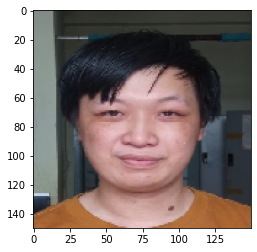

In [18]:
#Load va hien thi anh 
img1 = load_img(test_path + "/Quan/281.png",grayscale=False,color_mode='rgb',target_size=(150,150))
plt.imshow(img1)
#Chuyen Anh ve Dang Array
img1 = img_to_array(img1)
x1 = np.expand_dims(img1,axis=0)
images1 = np.vstack([x1])
#Du Doan hinh anh 
print('Day la '+ label[np.argmax(model.predict(images1))]) 